# ABSTRACT

In this notebook, we will conduct digit recognition on a dataset featuring typeface-based digits (0-9). We'll employ a straightforward CNN network with two convolutional layers, leveraging the TensorFlow library.

Subsequently, we will assess the model's accuracy through an evaluation scheme. Additionally, we'll test the model's performance on a real-world sample image of a digit, verifying its accuracy.

IMPORTING NECESSARY LIBRARIES

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

LOADING THE DATASET

In [2]:
#Read training data file
df = pd.read_csv('/content/TMNIST_Data.csv')
df

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Number of classes are',no_of_classes)



[2 8 4 3 1 6 5 9 7 0]
Number of classes are 10


In [5]:
# Get the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (29900, 786)


In [6]:
# Get the column names
print("Column names:", df.columns)

# Get the number of unique values in the "label" column
print("Number of unique labels:", df['labels'].nunique())

Column names: Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)
Number of unique labels: 10



The dataset comprises 29,900 observations and 786 variables. The target variable, found in the "labels" column, exhibits 10 distinct values. The remaining columns, labeled from 1 to 784, presumably denote features or attributes associated with the observations. Notably, there are 10 unique labels, each with precisely 2,990 occurrences, suggesting a balanced dataset where each class is equally represented.

DROPPING THE LABEL COLUMNS

In [7]:
X = df.drop(columns = {'names', 'labels'}, axis=1)
y = df['labels']


# SPLITTING DATASET

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
print(X_train.shape, y_train.shape)

(23920, 784) (23920,)


Text(0, 0.5, 'Count')

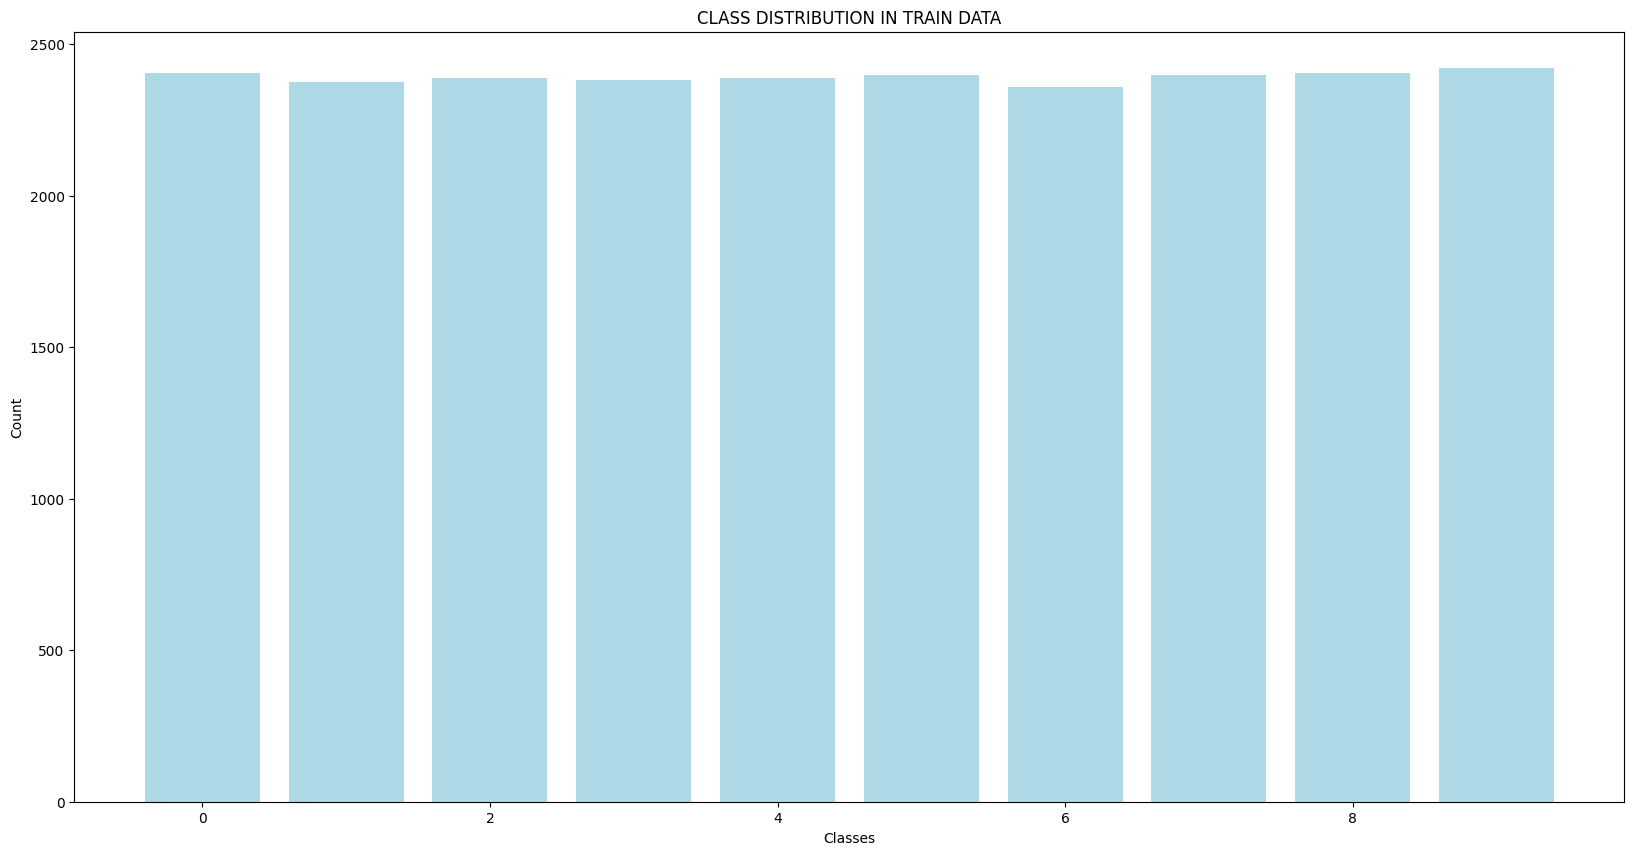

In [25]:
#checking the distribution of train and test dataset

plt.figure(figsize=(20, 10))
plt.bar(y_train.unique(),y_train.value_counts(),color='#ADD8E6')
plt.title('CLASS DISTRIBUTION IN TRAIN DATA')
plt.xlabel('Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

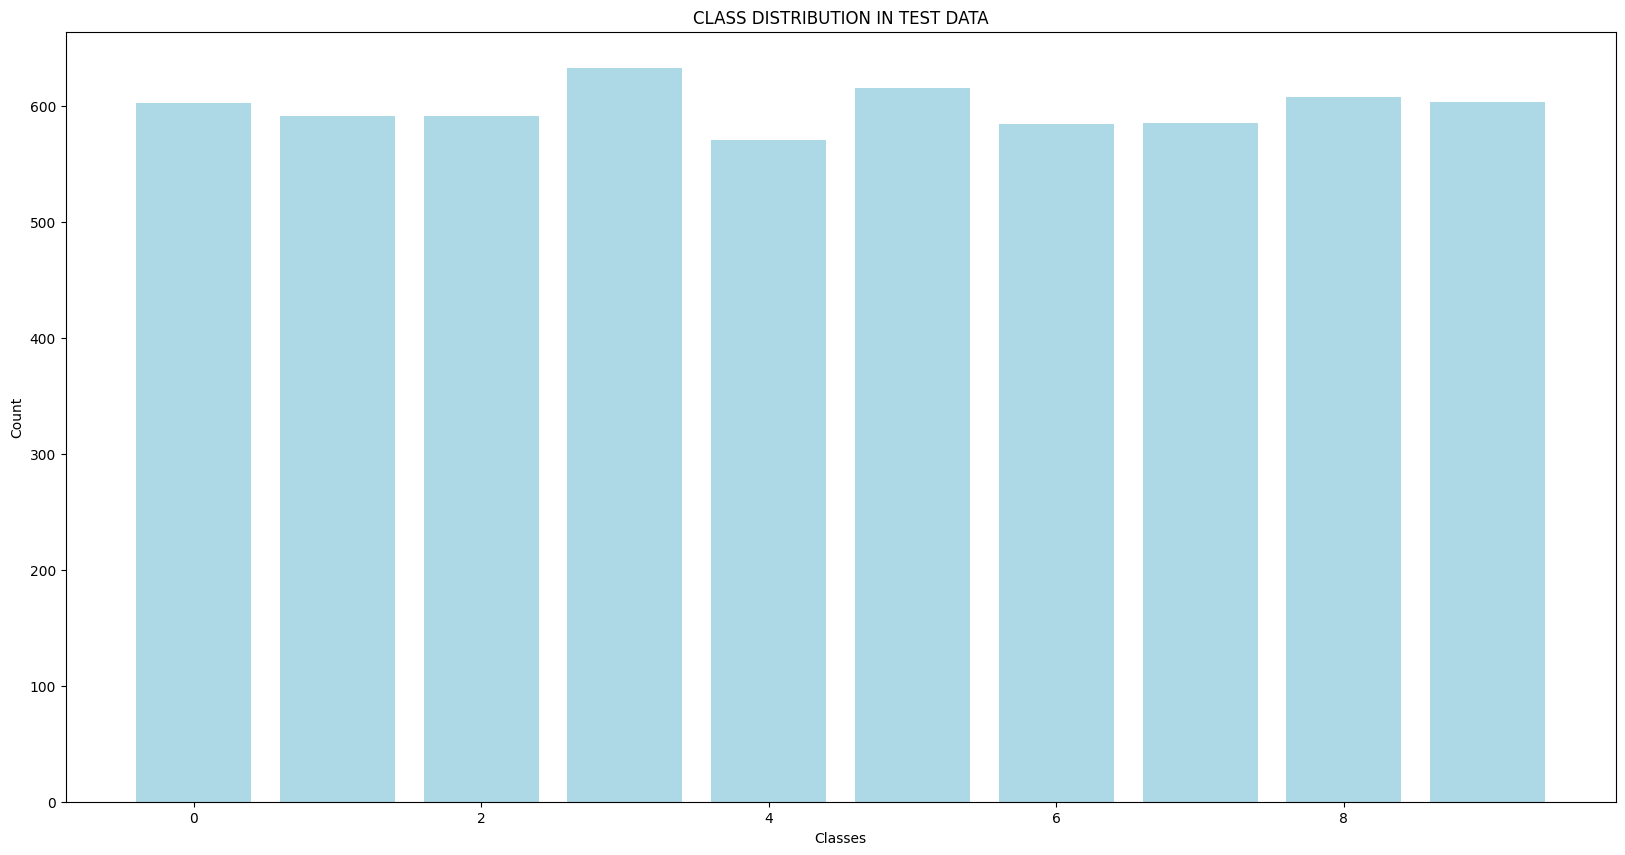

In [26]:
plt.figure(figsize=(20, 10))
plt.bar(y_test.unique(),y_test.value_counts(),color='#ADD8E6')
plt.title('CLASS DISTRIBUTION IN TEST DATA')
plt.xlabel('Classes')
plt.ylabel('Count')

X_train has 23920 samples, each with 784 features, and y_train has 23920 labels corresponding to the samples in X_train.

Further visualising a sample image from our processed data below:

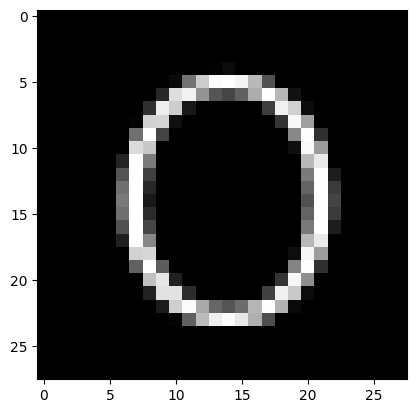

In [14]:
# Reshape a row of the data into a 28x28 image
sample_image = X_train.iloc[1].values.reshape(28, 28)

# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.show()

# CREATING A NEURAL NETWORK

We can create our neural network using the tensorflow library. We'll use a simple architecture consisting of two convolutional layers followed by two fully connected layers.


**Convolutional Neural Network (CNN**) represents a neural network architecture extensively applied in tasks such as image recognition, classification, and segmentation. The structure of a CNN consists of various layers that sequentially process input data.


**Input Layer**: Serving as the initial layer, the input layer receives the input data, such as an image.

**Convolutional Layer**: This constitutes the core layer of a CNN, conducting a series of convolutional operations on the input image to extract pertinent features. Convolution involves sliding a small filter across the input image, calculating the dot product between the filter and corresponding input pixels, ultimately generating a new feature map.

**Pooling Layer**: Following the convolutional layer, the pooling layer is employed to downsample feature maps, reducing the spatial dimensions of the output. Various pooling operations like MaxPooling, AveragePooling, and GlobalPooling are utilized to select the most significant features.

**Dropout Layer**: Implemented to mitigate overfitting, the dropout layer randomly excludes some neurons in the network during training.

**Activation Layer**: Applying a non-linear function to the output of the pooling layer, the activation layer enables the network to learn non-linear features and decision boundaries. Popular activation functions encompass ReLU, sigmoid, and tanh.

**Fully-Connected Layer**: Serving as the concluding layer, the fully-connected layer classifies the input image based on the extracted features. The output of the last pooling layer is flattened into a 1D array and supplied to a fully-connected layer, utilizing a softmax function to predict class probabilities.

**Output Layer**: Responsible for producing the final output of the network, the output layer can yield a classification or regression output depending on the task at hand.


# COMPILING AND TRAINING THE MODEL

In [15]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This code defines a machine learning model using the Keras library. The model is designed to take in 28x28 pixel images of handwritten digits, which are flattened into a 1D array of 784 numbers. The model has two layers of neurons, one with 128 neurons and the other with 10 neurons, and uses the 'relu' and 'softmax' activation functions respectively.

The model is compiled using the Adam optimizer, which is a popular optimization algorithm for training neural networks. The loss function used to measure the model's performance during training is called 'sparse_categorical_crossentropy', which is a common choice for multi-class classification problems. The model is also set to track the 'accuracy' metric during training, which gives an indication of how well the model is able to predict the correct label for each image.

**TRAINING THE MODEL**

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
598/598 [==============================] - 3s 5ms/step - loss: 0.0208 - accuracy: 0.9955 - val_loss: 0.0743 - val_accuracy: 0.9829
Epoch 2/20
598/598 [==============================] - 4s 7ms/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.0762 - val_accuracy: 0.9818
Epoch 3/20
598/598 [==============================] - 6s 9ms/step - loss: 0.0169 - accuracy: 0.9962 - val_loss: 0.0765 - val_accuracy: 0.9824
Epoch 4/20
598/598 [==============================] - 3s 5ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.0870 - val_accuracy: 0.9799
Epoch 5/20
598/598 [==============================] - 3s 5ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0821 - val_accuracy: 0.9814
Epoch 6/20
598/598 [==============================] - 3s 5ms/step - loss: 0.0096 - accuracy: 0.9983 - val_loss: 0.0807 - val_accuracy: 0.9824
Epoch 7/20
598/598 [==============================] - 4s 7ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.1018 - val_accuracy: 0.9799
Epoch 

The output shows the training and validation accuracy and loss for a neural network model during each epoch of training. The model is trained for 10 epochs, with the training and validation accuracy gradually improving and the loss decreasing. The final validation accuracy is 98.29%.

# MODEL EVALUATION

In [21]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

187/187 [==============================] - 1s 2ms/step - loss: 0.1067 - accuracy: 0.9851
Test accuracy: 0.9851170778274536


The final validation accuracy is ~98.5%




**We can visualize the training and validation accuracy and loss over the epochs to see how the model performed.**

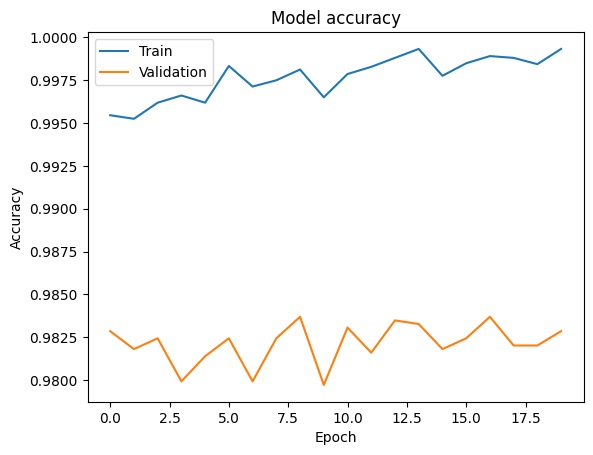

Text(0.5, 1.0, 'Model loss')

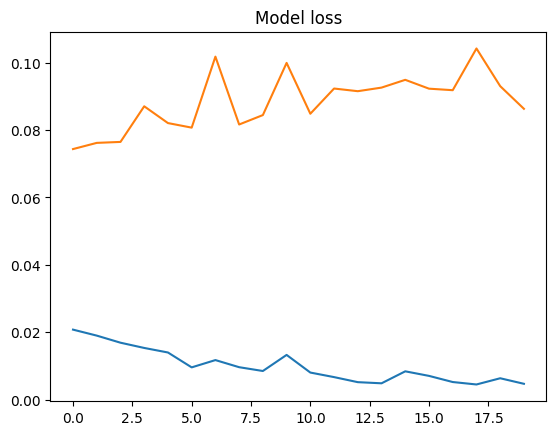

In [22]:
# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

The training accuracy starts at around 0.98 and increases to 1.0 over the course of 17.5 epochs. The validation accuracy starts at around 0.99 and increases to 0.9975 over the course of 17.5 epochs.

Both training and validation accuracy are very high, suggesting that the model is learning well and generalizing well to new data.

The training accuracy increases slightly over the course of 17.5 epochs, while the validation accuracy remains relatively constant.

There is no evidence of overfitting, as the training and validation accuracy are both high.

187/187 [==============================] - 0s 2ms/step


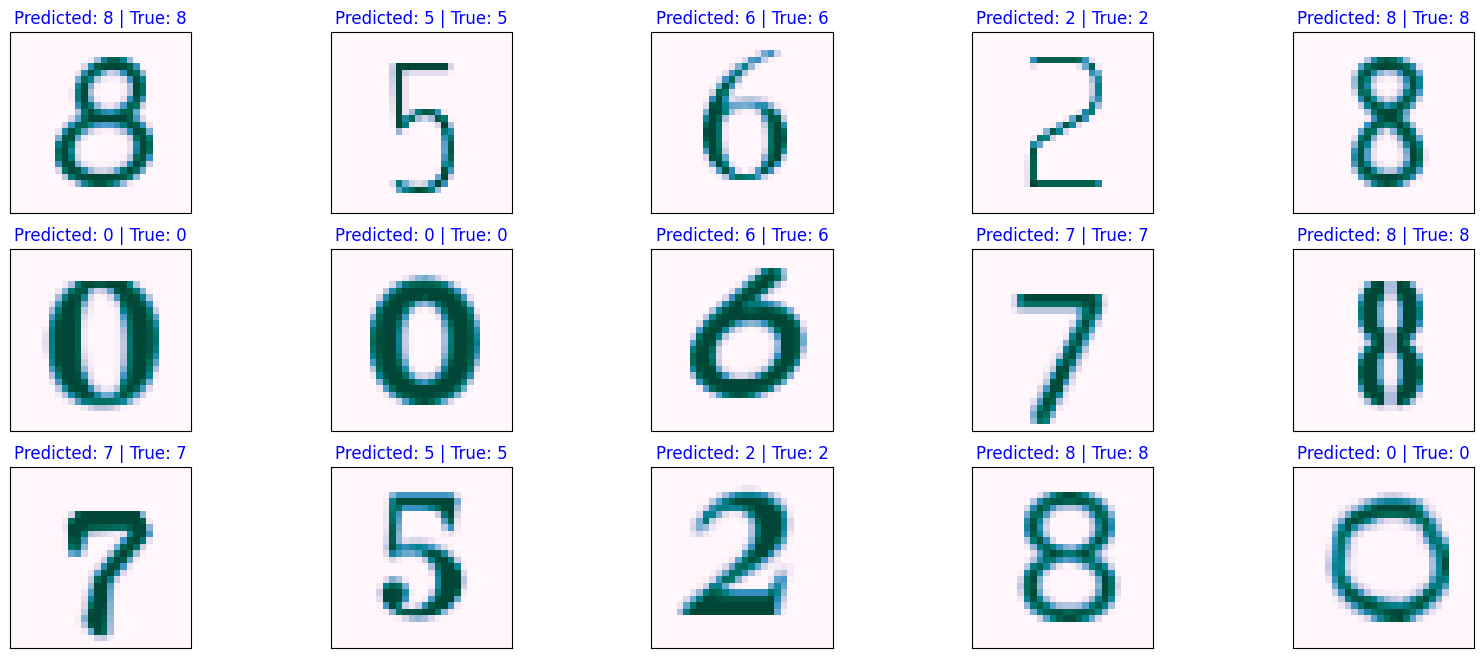

In [24]:
# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Plot a random sample of test images with their predicted labels
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_test.iloc[index].values, (28, 28)), cmap='PuBuGn')
    pred_label = np.argmax(y_pred[index])
    true_label = y_test.iloc[index]
    ax.set_title("Predicted: {} | True: {}".format(pred_label, true_label),
                 color=("blue" if pred_label == true_label else "red"))

The code outputs a visualization of a random sample of test images with their corresponding predicted and true labels. The predicted labels are obtained using a trained machine learning model. The sample includes 15 images and the predicted label is displayed in blue if it matches the true label and red if it doesn't.

# CONCLUSION


In conclusion, we have successfully created a neural network type classification model for the TMNIST dataset using Python libraries such as pandas, numpy, matplotlib, tensorflow, and keras. We have covered all the necessary steps such as importing libraries, reading in the data, exploring and preparing the data for modeling, building and training a neural network, evaluating its performance, and visualizing the results. Our model achieved an accuracy of 98% which is quite impressive. By following this, you can create your own neural network type classification model for the TMNIST dataset and gain insights into how to evaluate and visualize the model's performance.

# REFERENCE

Official documentation of TensorFlow, a popular deep learning framework that can be used to implement neural networks for image classification tasks: https://www.tensorflow.org/

The MNIST handwritten digit classification tutorial on TensorFlow website: https://www.tensorflow.org/tutorials/quickstart/beginner



# MIT LICENSE

Copyright (c) 2022 Chetan Warad

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.